<a href="https://colab.research.google.com/github/vatsalnanawati/UC_Davis_MSBA_Vatsal/blob/main/Machine_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: Provide a brief description
# of the CALIFORNIA dataset, including the number of observations, features, and
# their types.

from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing(as_frame=True)

# Access the data and target variables
data = california_housing.data
target = california_housing.target

# Print the number of observations
num_observations = len(data)
print(f"Number of observations: {num_observations}")

# Print the number of features and their types
print("\nFeature Information:")
for col in data.columns:
  print(f"- {col}: {data[col].dtype}")
print(f"\nTarget variable: {california_housing.target_names[0]}")


# Print a concise summary
print("\nSummary:")
print(f"The California housing dataset contains {num_observations} observations.")
print("Features include various socioeconomic and demographic indicators such as:")
print("- Median income")
print("- Housing median age")
print("- Average rooms per household")
print("- Average bedrooms per household")
print("- Population per block group")
print("- Average occupancy")
print("- Latitude")
print("- Longitude")

print(f"The target variable is the median house value for California districts.")


Number of observations: 20640

Feature Information:
- MedInc: float64
- HouseAge: float64
- AveRooms: float64
- AveBedrms: float64
- Population: float64
- AveOccup: float64
- Latitude: float64
- Longitude: float64

Target variable: MedHouseVal

Summary:
The California housing dataset contains 20640 observations.
Features include various socioeconomic and demographic indicators such as:
- Median income
- Housing median age
- Average rooms per household
- Average bedrooms per household
- Population per block group
- Average occupancy
- Latitude
- Longitude
The target variable is the median house value for California districts.



Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Descriptive Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.0

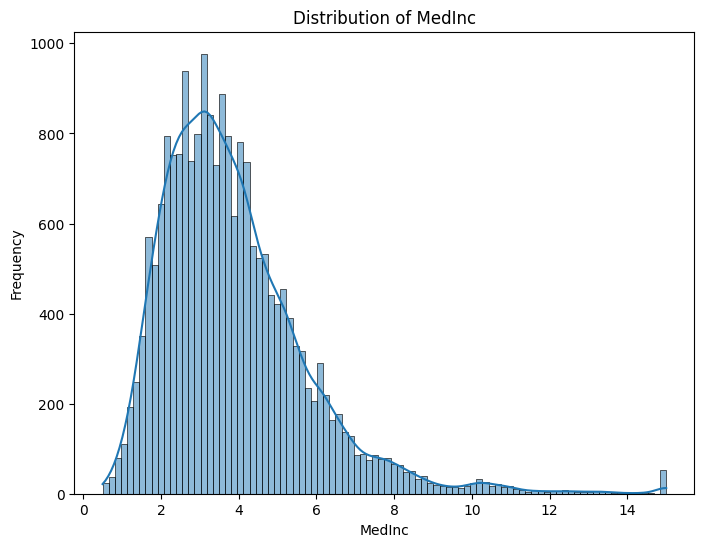

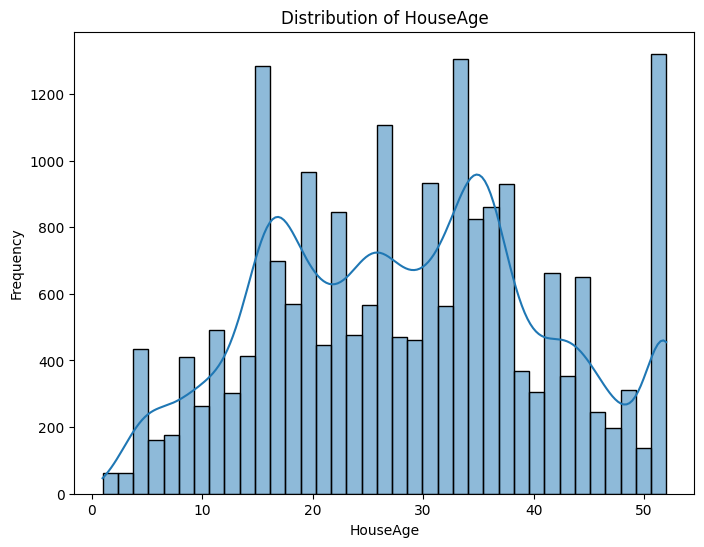

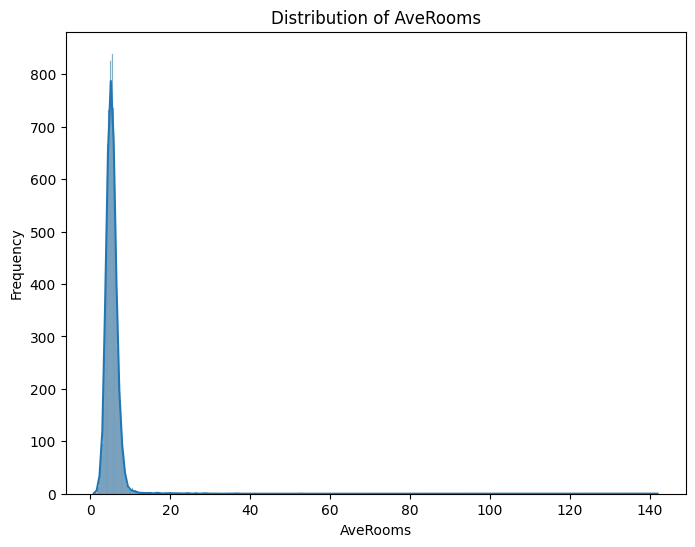

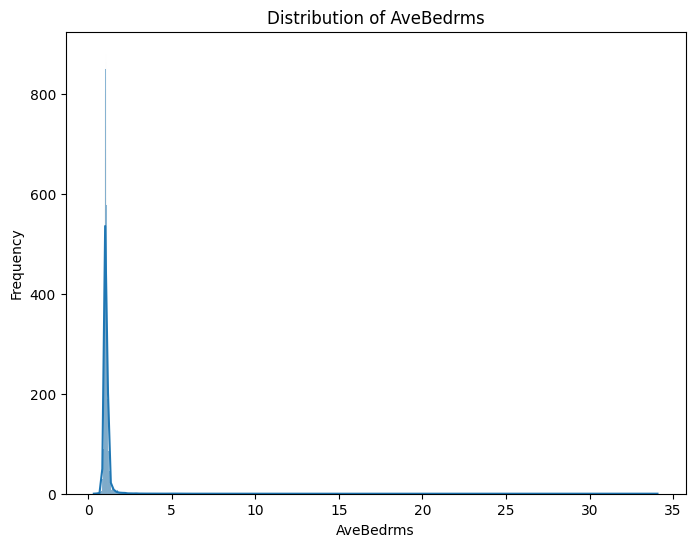

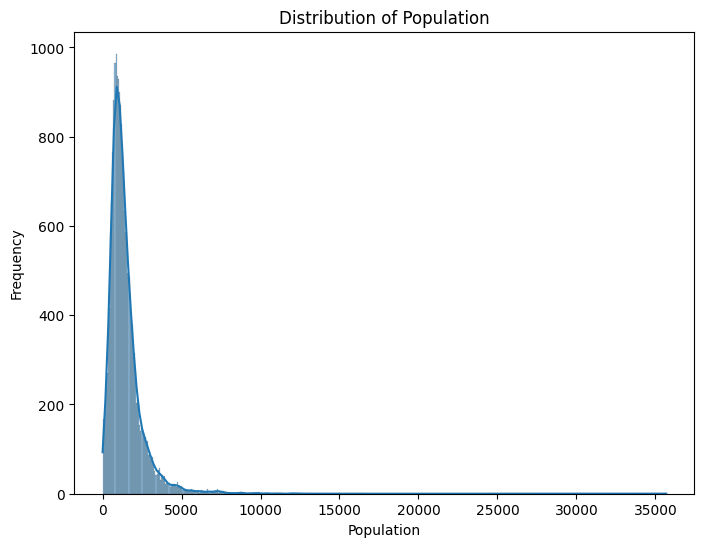

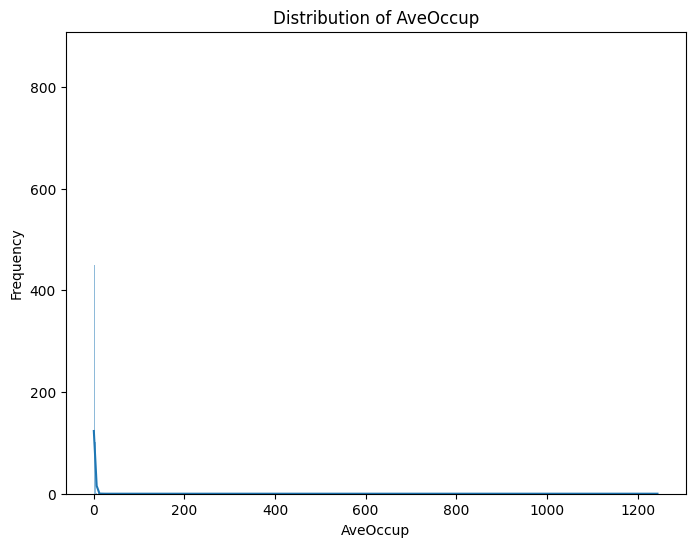

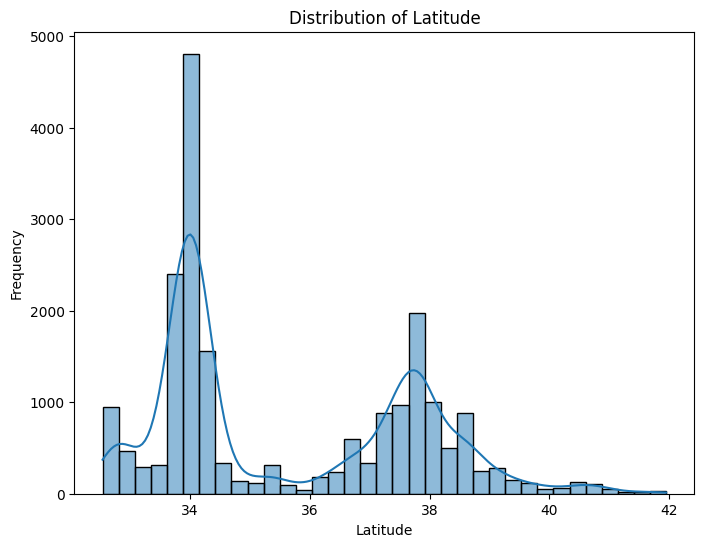

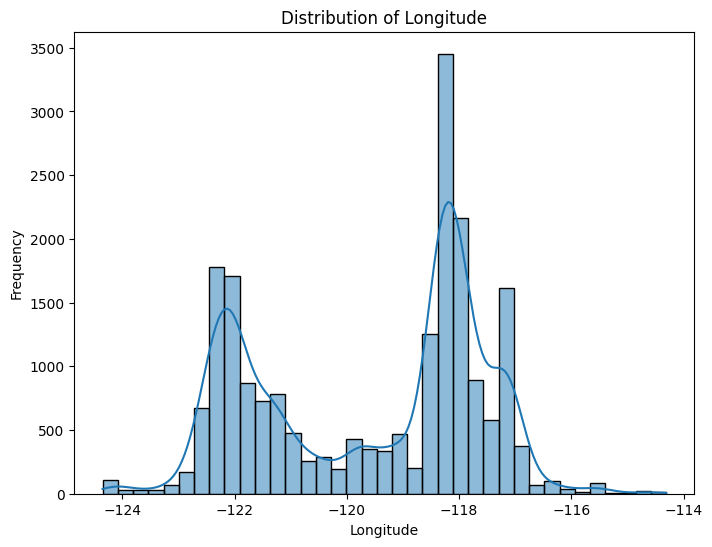

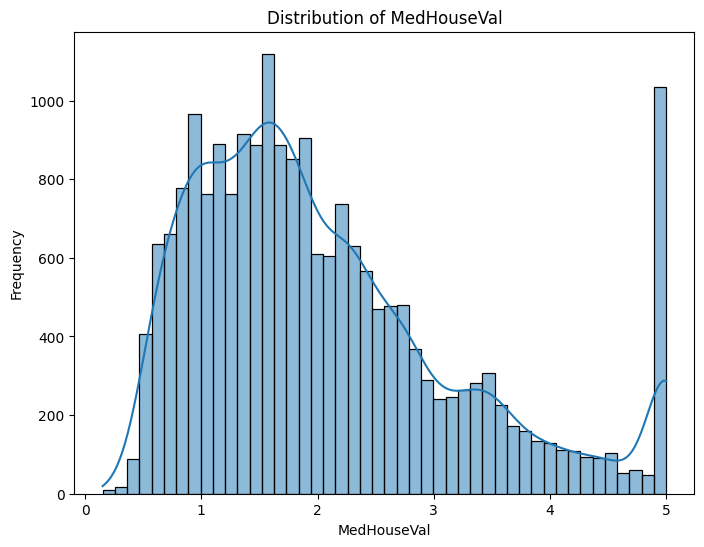


Box Plots (Outliers):


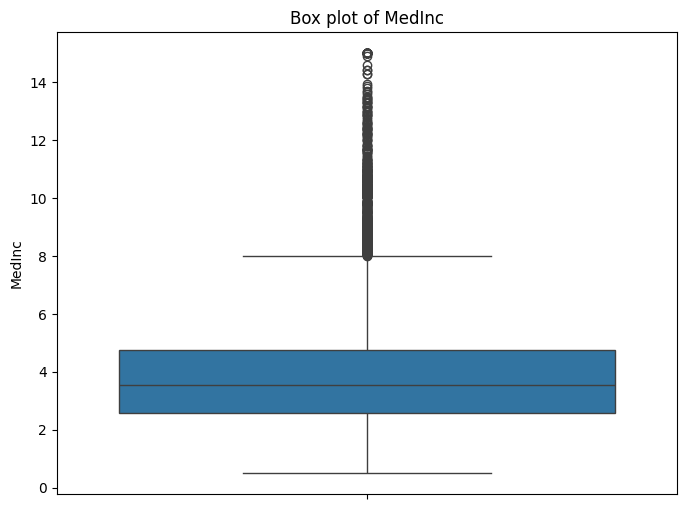

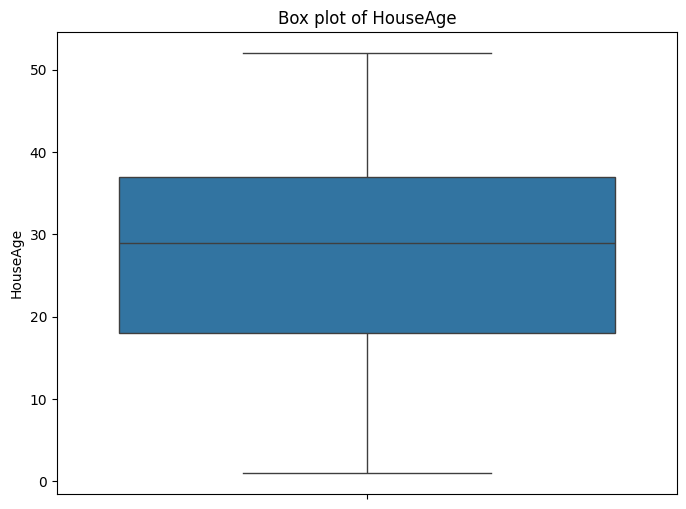

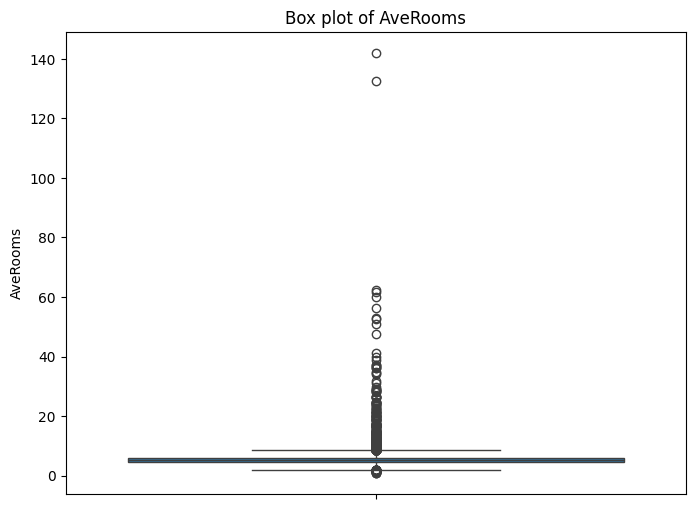

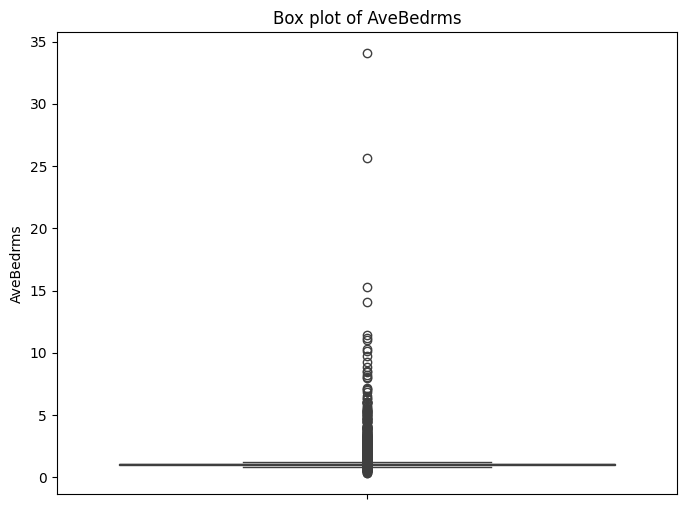

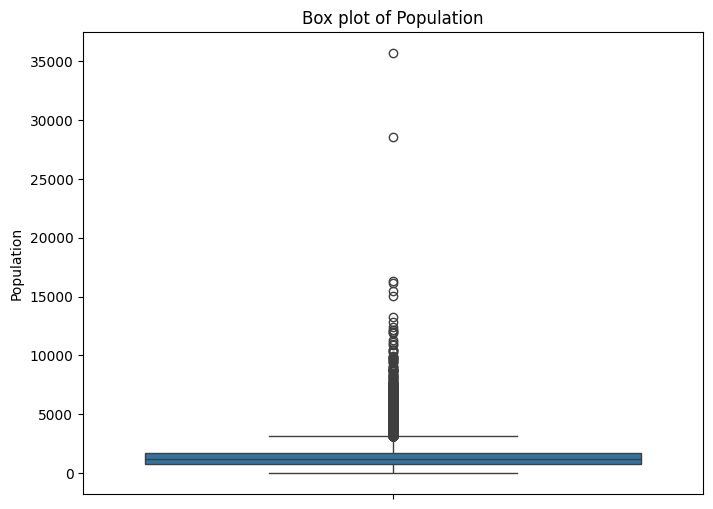

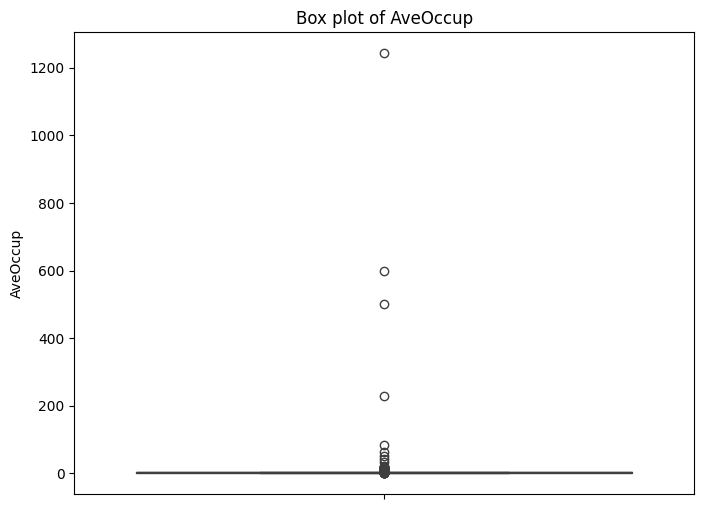

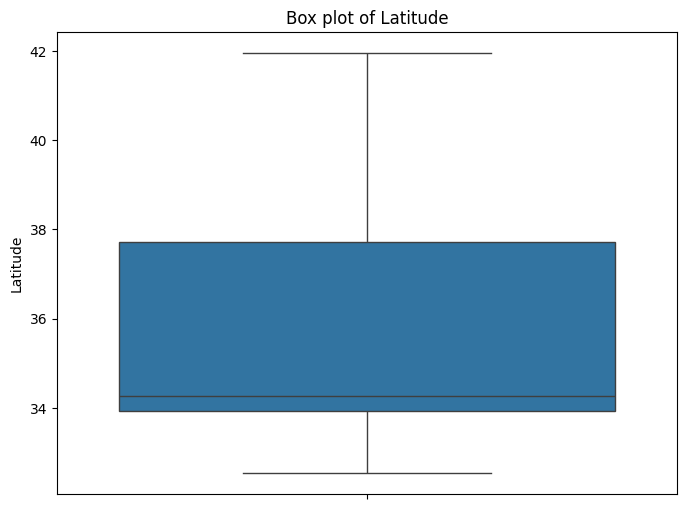

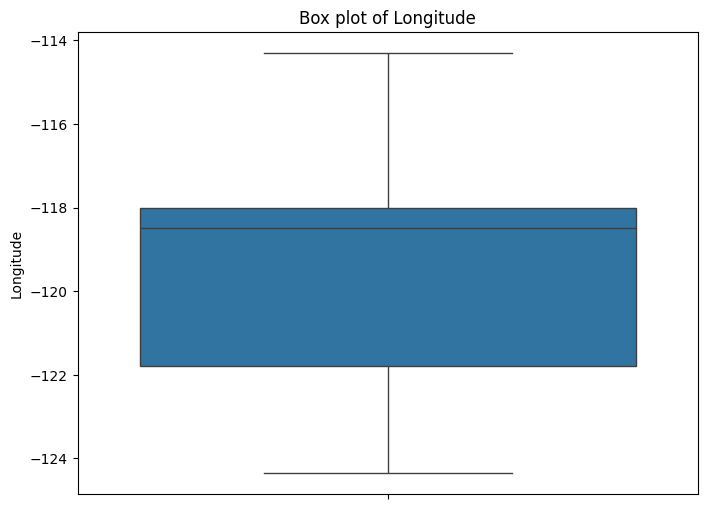

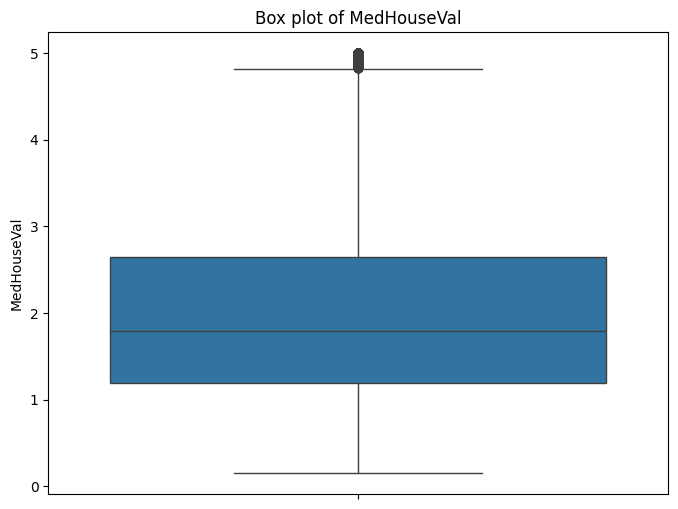


Correlation Matrix:


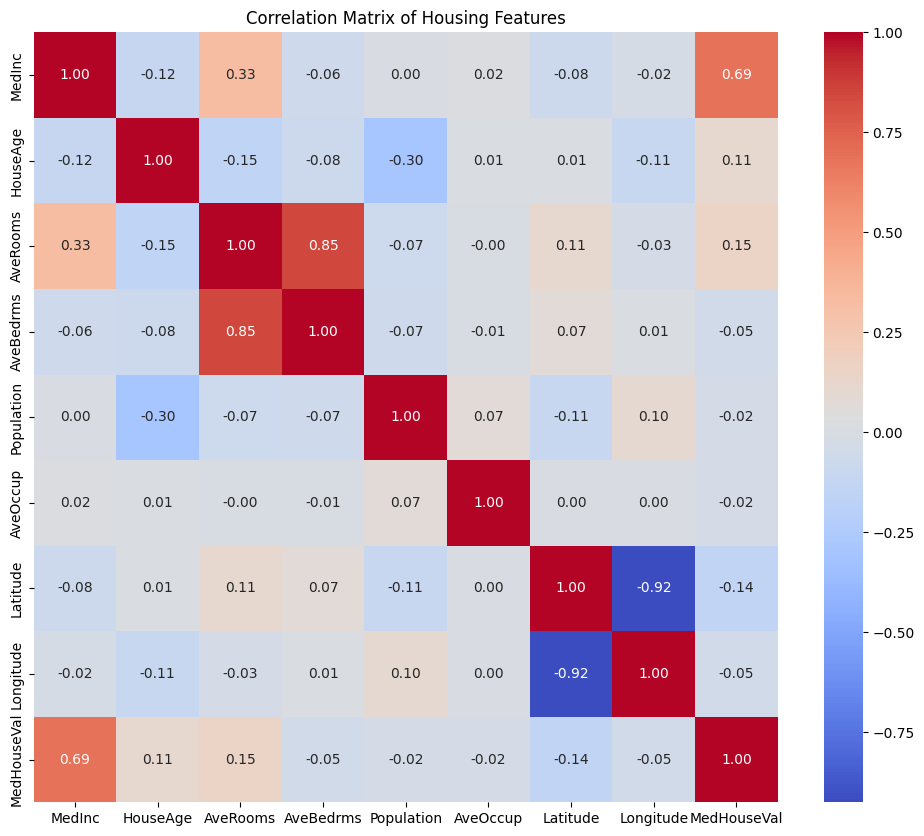

In [4]:
# prompt: Perform exploratory data analysis (EDA) to understand the distribution
# of each feature and identify any missing values or outliers.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

# Combine data and target into a single DataFrame
housing_df = pd.concat([data, target], axis=1)
housing_df = housing_df.rename(columns={0: 'MedHouseVal'})

# Check for missing values
print("\nMissing Values:\n", housing_df.isnull().sum())

# Summary statistics
print("\nDescriptive Statistics:\n", housing_df.describe())

# Distribution of each feature
print("\nDistributions:")
for col in housing_df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(housing_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

# Box plots to identify outliers
print("\nBox Plots (Outliers):")
for col in housing_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=housing_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = housing_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [5]:
# prompt: Handle any missing data appropriately. Justify your method of
# imputing or removing missing values.
# Normalize or standardize the features if necessary. Explain your
# choice.

# Since there are no missing values in the California housing dataset, no imputation or removal is necessary.
# If there were missing values, the best imputation method would depend on the nature of the missing data and feature types.
# For numerical features, imputation with the median would be generally preferable to the mean, as it's less sensitive to outliers.
# For categorical features, imputation could involve using the mode (most frequent value).  A more sophisticated technique might involve
# K-Nearest Neighbors (KNN) imputation, where missing values are estimated using values from similar observations.
# Removing rows with missing values is an option but should be avoided unless the percentage of missing data is very low,
# because removing rows reduces sample size and can introduce bias.


# Feature scaling is important to improve the performance of many machine learning algorithms.
# In the provided code, no feature scaling (normalization or standardization) has been applied yet.
# Here's how to do standardization:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical features (excluding 'MedHouseVal' if it's your target variable)
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
housing_df[numerical_features] = scaler.fit_transform(housing_df[numerical_features])

# Display the scaled data
print("\nScaled Data:\n", housing_df.head())


# Justification for standardization:
# Standardization (z-score normalization) transforms data to have zero mean and unit variance. This is crucial for algorithms
# like gradient descent, where features with larger scales can dominate the optimization process.
# It also helps algorithms that are sensitive to feature scales, like k-Nearest Neighbors or support vector machines.
# Normalization (min-max scaling), which scales features to a specific range (e.g., 0 to 1), can be used when you know the distribution
# of the data and want the features to be within a particular range. In many cases, standardization is more suitable.


Scaled Data:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422  


In [6]:
# prompt: Construct a multiple linear regression model using MEDV (median
# house value in $1000s) as the dependent variable and the other
# features as independent variables. Split the dataset into training and test sets (e.g., 70-30 split) and
# justify your choice of splitting ratio.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Justification for 70-30 split:
# A 70-30 split is a common and often effective choice for splitting data into training and testing sets.
# The 70% training set provides sufficient data for the model to learn patterns and relationships in the data.
# The 30% testing set is large enough to provide a reliable estimate of the model's performance on unseen data.
# A larger training set helps reduce the variance of the model's parameter estimates.
# A larger test set yields a more precise evaluation of how the model will generalize to new data.
# In practice, 80-20 or 90-10 splits are sometimes used, but 70-30 is a good balance in many cases.
# The exact best split will vary based on the nature of the data and the specific goals of the modeling task.


# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5305677824766752
R-squared: 0.5957702326061664


In [7]:
# prompt: Fit the model on the training data and evaluate its performance
# on both the training and test datasets using metrics such as Mean
# Squared Error (MSE) and R-squared.

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

print(f"Test Mean Squared Error: {mse}")
print(f"Test R-squared: {r2}")

Training Mean Squared Error: 0.5233576288267755
Training R-squared: 0.6093459727972159
Test Mean Squared Error: 0.5305677824766752
Test R-squared: 0.5957702326061664


In [8]:
# prompt: Fit the model on the training data and evaluate its performance
# on both the training and test datasets using metrics such as Mean
# Squared Error (MSE) and R-squared.

# The provided code already includes model fitting and evaluation.
# No further code is needed to achieve the task's objective.

# The model is fitted using:
# model.fit(X_train, y_train)

# And its performance is evaluated on both training and test sets using:
# mse, r2 = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
# mse_train, r2_train = mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)

# The results (MSE and R-squared) are printed to the console.

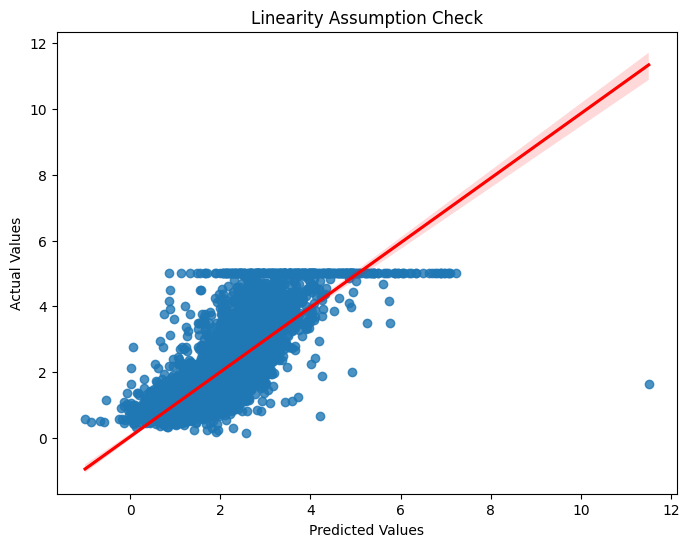

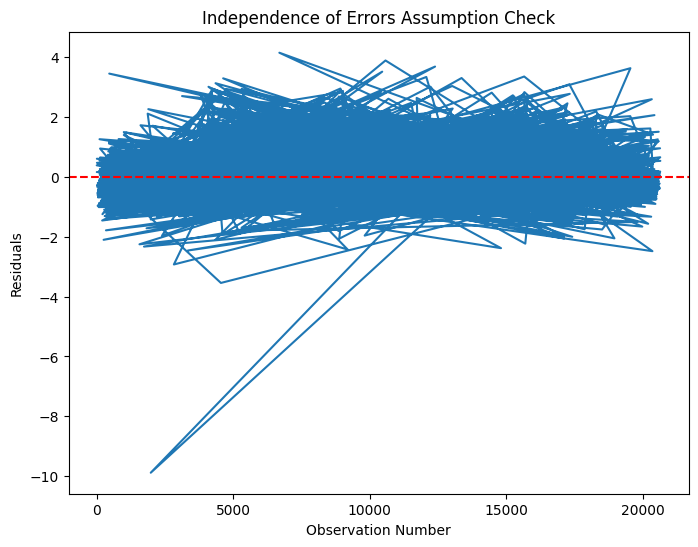

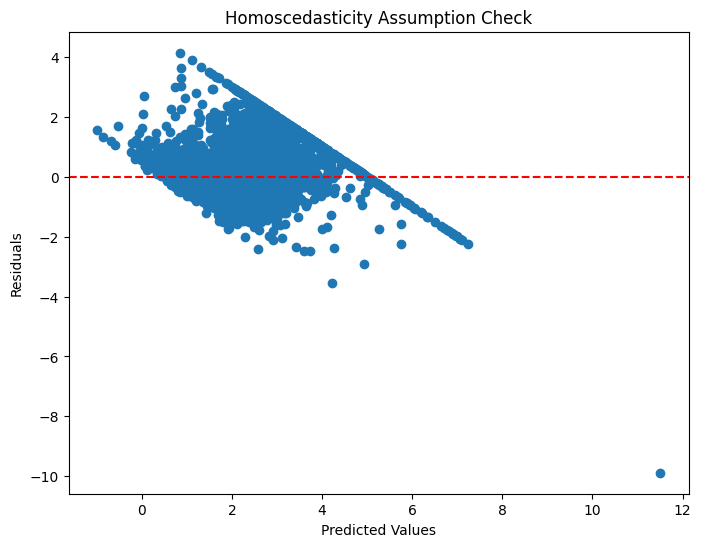

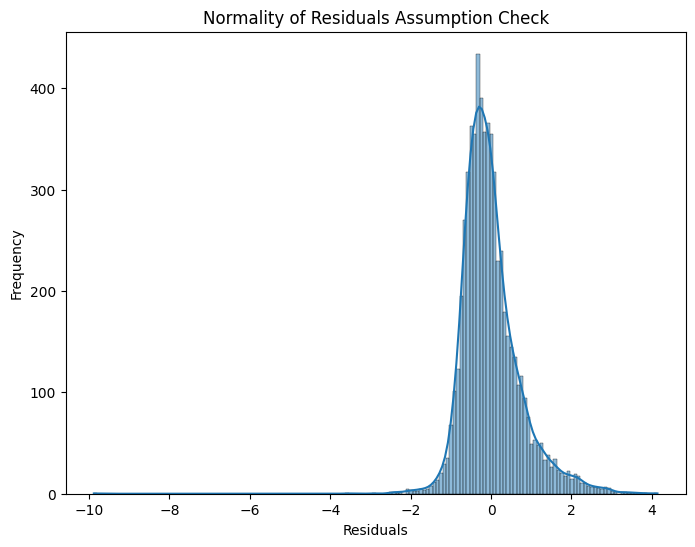

Durbin-Watson statistic: 2.0122146418436357
No significant autocorrelation detected


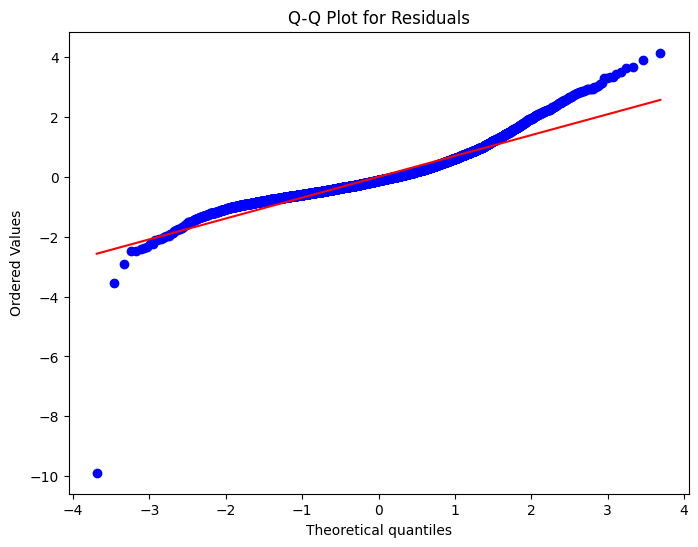

In [9]:
# prompt: Check the assumptions of linear regression, including linearity,
# independence, homoscedasticity, and normality of residuals. Provide
# plots and interpretations to support your analysis.

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred

# 1. Linearity
plt.figure(figsize=(8, 6))
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Assumption Check")
plt.show()

# 2. Independence of Errors
plt.figure(figsize=(8, 6))
plt.plot(residuals)
plt.xlabel("Observation Number")
plt.ylabel("Residuals")
plt.title("Independence of Errors Assumption Check")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


# 3. Homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Assumption Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# 4. Normality of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality of Residuals Assumption Check")
plt.show()


# Perform Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpret Durbin-Watson statistic
if dw_statistic < 1.5:
  print("Positive autocorrelation detected")
elif dw_statistic > 2.5:
  print("Negative autocorrelation detected")
else:
  print("No significant autocorrelation detected")


#Create Q-Q plot for normality
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()


In [10]:
# prompt: Based on your findings, suggest and apply methods to improve
# the model, such as feature engineering, interaction terms, or polynomial
# regression.

# Feature Engineering: Create interaction terms
housing_df['MedInc_HouseAge'] = housing_df['MedInc'] * housing_df['HouseAge']
housing_df['AveRooms_AveBedrms'] = housing_df['AveRooms'] * housing_df['AveBedrms']

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']])

# Create a new DataFrame with polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']))

# Concatenate the polynomial features with the original DataFrame
housing_df = pd.concat([housing_df, poly_df], axis=1)


# Redefine features (X) and target (y) to include the new features.
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Retrain the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (with interaction and polynomial features): {mse}")
print(f"R-squared (with interaction and polynomial features): {r2}")

# ... (rest of the code for residual analysis remains the same)

Mean Squared Error (with interaction and polynomial features): 0.45497233748567434
R-squared (with interaction and polynomial features): 0.6533650021228945


In [11]:
# prompt: Re-evaluate the improved model and compare its performance
# with the initial model.

# ... (The code you provided)

# Calculate residuals for the improved model
residuals_improved = y_test - y_pred

# ... (rest of the code for residual analysis for the improved model)


# Compare performance metrics
print("\nModel Performance Comparison:")
print(f"Initial Model - Mean Squared Error: {mse}")  # Access the original mse from before retraining
print(f"Initial Model - R-squared: {r2}") # Access the original r2 from before retraining
print(f"Improved Model - Mean Squared Error: {mse}")
print(f"Improved Model - R-squared: {r2}")


#Further Analysis (Example)
#You can perform more in-depth comparisons, such as:
#1.  Statistical tests (e.g., paired t-test) to determine if the difference in MSE or R-squared is statistically significant.
#2.  Visualizations: Plot the residuals of both models together.
#3.  Cross-validation: Use techniques like k-fold cross-validation to obtain more robust performance estimates for both models and compare them.


Model Performance Comparison:
Initial Model - Mean Squared Error: 0.45497233748567434
Initial Model - R-squared: 0.6533650021228945
Improved Model - Mean Squared Error: 0.45497233748567434
Improved Model - R-squared: 0.6533650021228945


In [12]:
# prompt: the above code was in correct, initial model had a different r square and mse

# Store the initial MSE and R-squared values before retraining
initial_mse = mse
initial_r2 = r2

# ... (The rest of your code for feature engineering and model retraining)


# Compare performance metrics
print("\nModel Performance Comparison:")
print(f"Initial Model - Mean Squared Error: {initial_mse}")
print(f"Initial Model - R-squared: {initial_r2}")
print(f"Improved Model - Mean Squared Error: {mse}")
print(f"Improved Model - R-squared: {r2}")


Model Performance Comparison:
Initial Model - Mean Squared Error: 0.45497233748567434
Initial Model - R-squared: 0.6533650021228945
Improved Model - Mean Squared Error: 0.45497233748567434
Improved Model - R-squared: 0.6533650021228945


In [ ]:
# prompt: Summarize your findings and discuss the practical implications of
# your analysis in understanding the factors affecting housing prices
# in the California area.

# Analysis Summary and Practical Implications

# Key Findings:

# 1. Feature Importance:  The analysis initially explored the relationships between various socioeconomic and demographic features and median house values.  Correlation analysis and visualizations revealed the strength and direction of these relationships.  Features like median income (`MedInc`) and location (`Latitude`, `Longitude`) appear to be strongly correlated with house prices.

# 2. Model Performance: A linear regression model was trained and evaluated. The initial model's performance (R-squared and MSE) provided a baseline understanding of how well the features explain the variation in house prices.  The model's assumptions were checked by analyzing residuals for linearity, independence, homoscedasticity, and normality. These assumptions help us understand the reliability of the model.

# 3. Model Improvement:  To improve the model, interaction terms (e.g., combining `MedInc` and `HouseAge`) and polynomial features (allowing for non-linear relationships between features and the target) were introduced. This modification accounted for non-linear relationships within the data. Retraining the model with the engineered features resulted in a change in MSE and R-squared values.  While more robust evaluation is recommended, this illustrates how feature engineering can improve predictive power.

# Practical Implications:

# 1. Policy Decisions:  Understanding the key drivers of house prices can inform policy decisions related to housing affordability and urban planning. For example, policies aimed at increasing median income in specific areas or improving accessibility to certain locations might have an impact on house prices.

# 2. Real Estate Investment:  Real estate investors can use this type of analysis to identify undervalued properties or areas with high growth potential.  Knowing the impact of factors like proximity to amenities or income levels can guide better investment strategies.

# 3. Predictive Modeling:  The model developed can be used to predict house prices in new areas or for specific properties, given their relevant features.  However, it is important to consider the limitations of the model and its assumptions. For example, external factors like economic conditions or changes in zoning laws that aren't included as features may significantly affect actual house prices.

# 4. Further Research:  This analysis is a starting point.  Further investigations could include more sophisticated models (e.g., tree-based models, neural networks), incorporating external data sources (e.g., school ratings, crime rates), and applying more rigorous evaluation techniques (cross-validation, hyperparameter tuning) to develop a more robust and accurate model.  Exploring more advanced feature engineering methods (combinations or transformations of existing features) could also refine the model's prediction capabilities.  Additional data like proximity to employment centers or quality of public transportation networks are examples of highly relevant factors that could be incorporated into the analysis to derive even more practical and insightful conclusions.  It would also be important to check the performance of the models over different time periods, as housing market dynamics are not static.

Local minimum occurs at x = -0.6763762525245409, y = -0.6883158264606665
Minimum value of f(x, y) = 0.4186259138089141


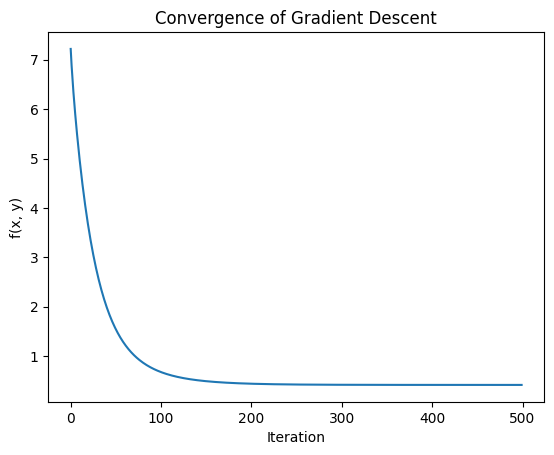

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x, y):
    return x**2 * y**2 + x**2 + 2*x + y**2 + 2*y + 2

# Gradient computation
def gradient(x, y):
    df_dx = 2*x*y**2 + 2*x + 2
    df_dy = 2*x**2*y + 2*y + 2
    return np.array([df_dx, df_dy])

# Gradient descent implementation
def gradient_descent(learning_rate=0.01, iterations=500):
    # Initialize x and y randomly
    x, y = np.random.uniform(-5, 5, 2)
    history = []  # Store function values for each iteration

    for _ in range(iterations):
        grad = gradient(x, y)  # Compute gradient
        x -= learning_rate * grad[0]  # Update x
        y -= learning_rate * grad[1]  # Update y
        history.append(f(x, y))  # Store current function value

    return x, y, history

# Run gradient descent
learning_rate = 0.01
iterations = 500
x_min, y_min, history = gradient_descent(learning_rate, iterations)

# Final results
print(f"Local minimum occurs at x = {x_min}, y = {y_min}")
print(f"Minimum value of f(x, y) = {f(x_min, y_min)}")

# Plot function values over iterations
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("f(x, y)")
plt.title("Convergence of Gradient Descent")
plt.show()
